<a href="https://colab.research.google.com/github/SumeetCEH/SumeetsAI/blob/main/Email_Spam_Detection_ML_%26_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email Spam Detection

first upload spam.csv file
from : https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/spam (1).csv',encoding='latin-1')

In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.size

11144

In [ ]:
df.isnull().sum()

,0
v1,0
v2,0


<Axes: xlabel='count', ylabel='v1'>

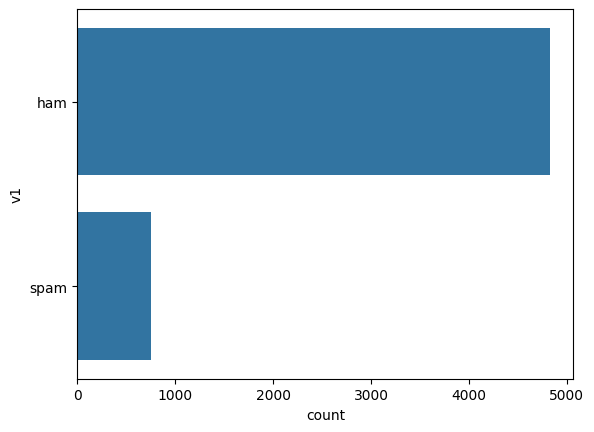

In [ ]:
sns.countplot(df['v1'])

In [ ]:
df.groupby('v1').count()

,v2
v1,
ham,4825
spam,747


In [ ]:
df.groupby('v1').size()

,0
v1,
ham,4825
spam,747


In [ ]:
label_df = df.groupby('v1').size().index

In [ ]:
value_df = df.groupby('v1').size().values

([<matplotlib.patches.Wedge at 0x7c715d12ec50>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'ham'),
  Text(1.0038714746336121, -0.44971331136284726, 'spam')],
 [Text(-0.547566295930048, 0.24529808715407267, '86.59%'),
  Text(0.5475662588910611, -0.24529816983428027, '13.41%')])

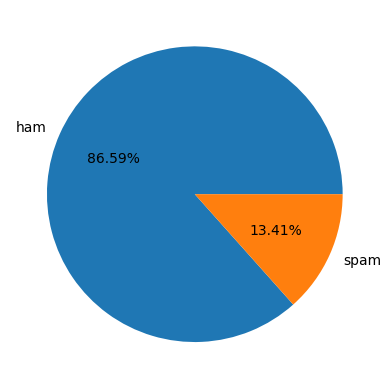

In [ ]:
# now let we create pie chart
plt.pie(value_df,labels=label_df,autopct='%1.2f%%')

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['v1']=le.fit_transform(df['v1'])

### Bag of Words technique (to convert text to numbers in which we create matrix and in it we search unique words to create columns and how many sentences will create rows)

and for it we use two technique :-

CountVectorizer

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(max_features=5000)                 #we create a vocubalary which hold 1000 unique words

In [ ]:
X = vectorizer.fit_transform(df['v2'])

In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 70244 stored elements and shape (5572, 5000)>

In [ ]:
y=df['v1']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)*100

97.82490483958674

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)

<Axes: >

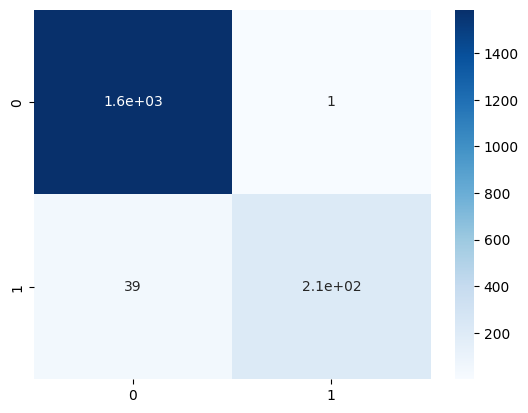

In [ ]:
sns.heatmap(cm,annot=True,cmap='Blues')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred)*100

91.62588363240893

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
accuracy_score(y_test,y_pred)*100

95.97607395323546

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
le = LogisticRegression()

In [ ]:
le.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = le.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
accuracy_score(y_test,y_pred)*100

97.93365959760739

#Now apply Deap Learning

In [ ]:
pip install --upgrade keras

In [ ]:
import keras
print(keras.__version__)

3.9.2


In [ ]:
model = keras.Sequential()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(
    keras.Input(
        shape=(5000,),
        batch_size=32
    )
)

In [ ]:
model.add(                                 #hidden layer
    keras.layers.Dense(
    32,
    activation='relu'
))

In [ ]:
model.add(                      # hidden layer
    keras.layers.Dense(
    64,
    activation='relu'
))

In [ ]:
model.add(                         ## Output layer
        keras.layers.Dense(
    1,
    activation='sigmoid'   # use when we check 1 and 0
)
)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (32, 32)               │       160,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 64)               │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,209 (633.63 KB)

 Trainable params: 162,209 (633.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
callback=keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    verbose=0,
    restore_best_weights=True,
)              ## it will increase accuracy

In [ ]:
# Convert the sparse matrix to a dense array
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [ ]:
model.fit(
    x=X_train_dense,
    y=y_train,
    batch_size=32,
    epochs=100,
    verbose="auto",
    validation_data=(X_test_dense,y_test),
    callbacks=[callback]
)

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8125 - loss: 0.5011 - val_accuracy: 0.9793 - val_loss: 0.0879
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9916 - loss: 0.0433 - val_accuracy: 0.9837 - val_loss: 0.0691
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9983 - loss: 0.0085 - val_accuracy: 0.9831 - val_loss: 0.0726
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9826 - val_loss: 0.0834
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9826 - val_loss: 0.0887


In [ ]:
model.evaluate(
    x=X_test_dense,
    y=y_test,
    batch_size=32,
    verbose="auto",
)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9843 - loss: 0.0563


[0.06905119866132736, 0.9836868047714233]